In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = sns.load_dataset('iris')

In [3]:
 iris.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
#Lets do some EDA

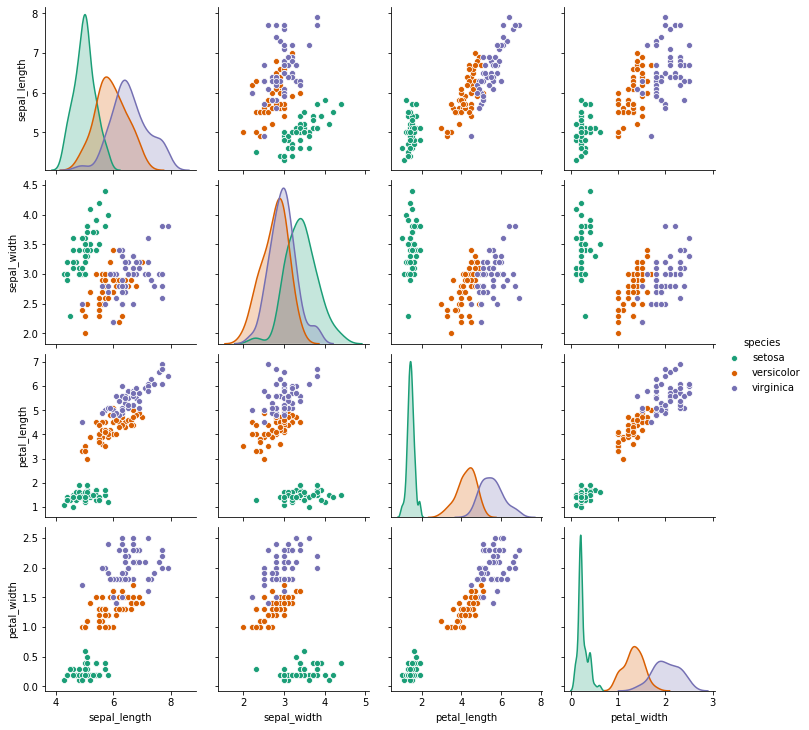

In [5]:
sns.pairplot(iris, hue ='species', palette= 'Dark2')

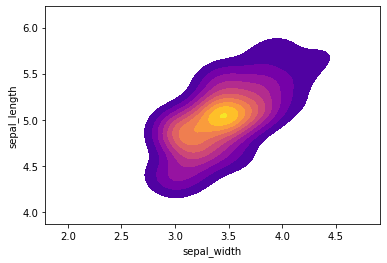

In [7]:
#Lets create the 'kde' plot for setosa width and length
setosa = iris[iris['species'] == 'setosa']
sns.kdeplot(setosa['sepal_width'], setosa['sepal_length'], cmap = 'plasma', shade=True, shade_lowest=False)

In [8]:
#Lets build the the model
from sklearn.model_selection import train_test_split

In [9]:
X = iris.drop('species',axis = 1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
from sklearn.svm import SVC
svm_model = SVC()

In [11]:
svm_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
pred = svm_model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


In [16]:
#Lets improve the the results from GridSearchCV
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {'C':[0.1,1,10,100] , 'gamma': [1,0.1,0.01,0.001]}

In [18]:
grid = GridSearchCV(SVC(), param_grid, verbose=2)

In [25]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .................................. C=10, gamma=0.1, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .................................. C=10, gamma=0.1, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [26]:
grid.best_params_

{'C': 100, 'gamma': 0.01}

In [27]:
grid.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
grid_pred = grid.predict(X_test)

In [30]:
print(confusion_matrix(y_test, grid_pred))
print('\n')
print(classification_report(y_test, grid_pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [ ]:
#After grid search we have predicted every thing accurately